# 1. Loading Data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read csv file
df = pd.read_csv('Bank_account_fraud_dataset_Base.csv')
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

<Axes: title={'center': 'churn Frequency'}, ylabel='fraud_bool'>

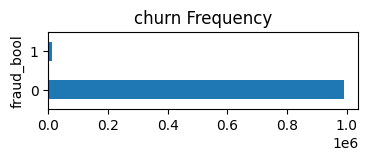

In [3]:
#explore target col
df['fraud_bool'].value_counts().plot(kind='barh',figsize=(4,1),title='churn Frequency')

# 2. Preprocessing


In [4]:
new_df = df.copy()


2A. Handle Missing Values

In [5]:
#Check for missing values in all applications
# -1 = null values
list1 = ['prev_address_months_count', 'current_address_months_count','bank_months_count', 'device_distinct_emails_8w']
for i in list1:
    new_col = i + '_is_null'
    new_df[new_col]=0
    new_df[new_col]=np.where(new_df[i]==-1, 1, new_df[new_col])

print(new_df['prev_address_months_count_is_null'].value_counts())
print(new_df['current_address_months_count_is_null'].value_counts())
print(new_df['bank_months_count_is_null'].value_counts())
print(new_df['device_distinct_emails_8w_is_null'].value_counts())

prev_address_months_count_is_null
1    712920
0    287080
Name: count, dtype: int64
current_address_months_count_is_null
0    995746
1      4254
Name: count, dtype: int64
bank_months_count_is_null
0    746365
1    253635
Name: count, dtype: int64
device_distinct_emails_8w_is_null
0    999641
1       359
Name: count, dtype: int64


In [6]:
#remove null rows (-1 values) from current address months count col
new_df = new_df.loc[new_df['current_address_months_count']!=-1]
print(new_df['current_address_months_count'].describe())

count    995746.000000
mean         86.962058
std          88.409289
min           0.000000
25%          20.000000
50%          53.000000
75%         130.000000
max         428.000000
Name: current_address_months_count, dtype: float64


In [7]:
#Previous address: replace -1 (null) with 0 -->  indicates no previous address
new_df['prev_address_months_count']= new_df['prev_address_months_count'].replace(-1, 0)
print(new_df['prev_address_months_count'].describe())

count    995746.000000
mean         17.288646
std          43.659818
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max         383.000000
Name: prev_address_months_count, dtype: float64


2B. Handle Outliers

In [8]:
def visualize_outliers(df, cols):
    for col in cols:
       fig, axs = plt.subplots(1,2, figsize=(7, 3))
       fig.suptitle(f'Outliers in {col}',fontsize=14)

       #boxplot
       sns.boxplot(x=df[col], ax=axs[0], color='skyblue')
       axs[0].set_title('Boxplot')
       #historigram
       sns.histplot(df[col],kde=True, ax=axs[1],color='salmon')
       axs[1].set_title('Histogram')
       plt.tight_layout()  
       plt.show()

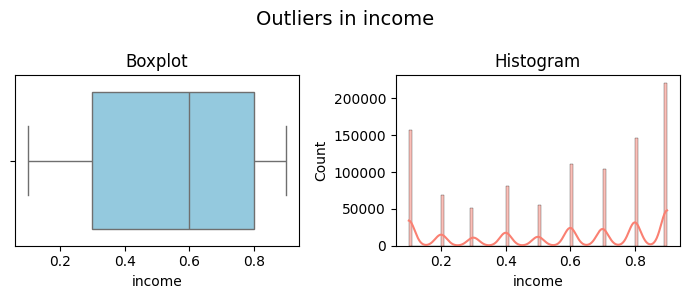

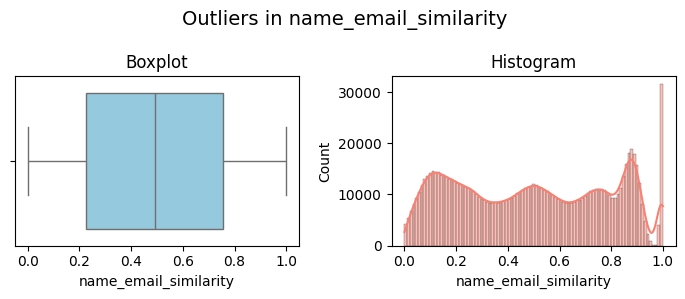

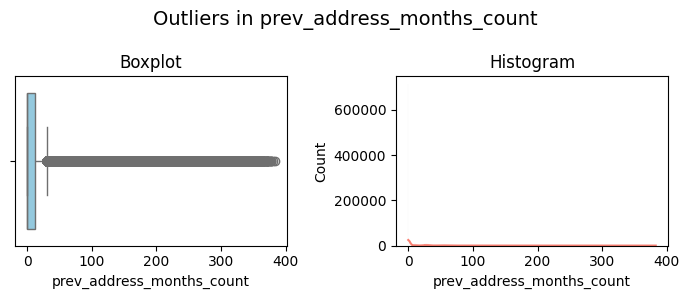

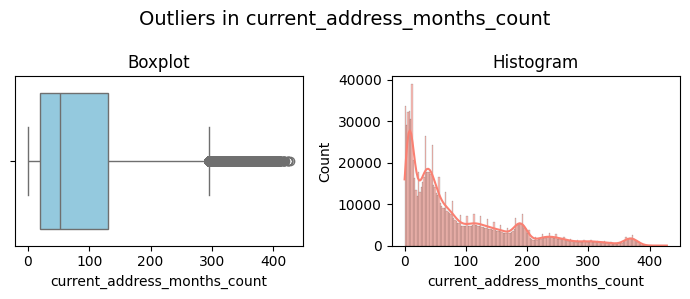

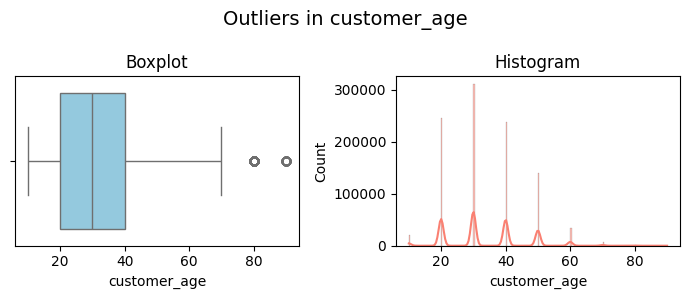

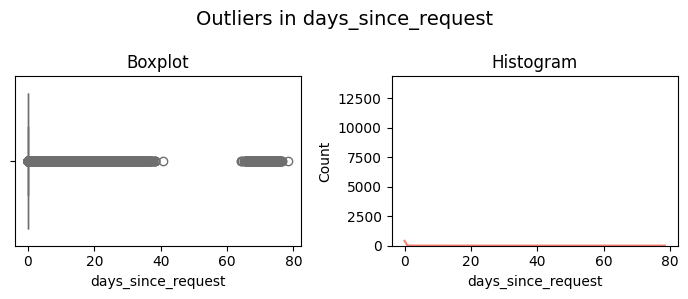

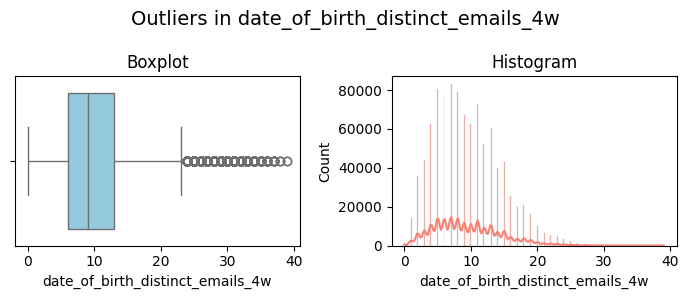

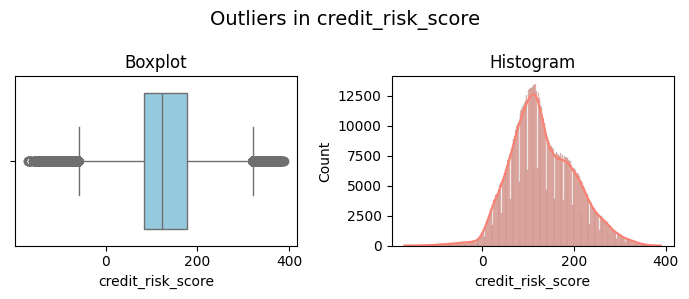

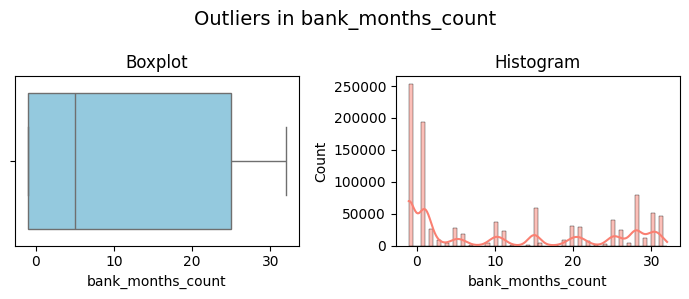

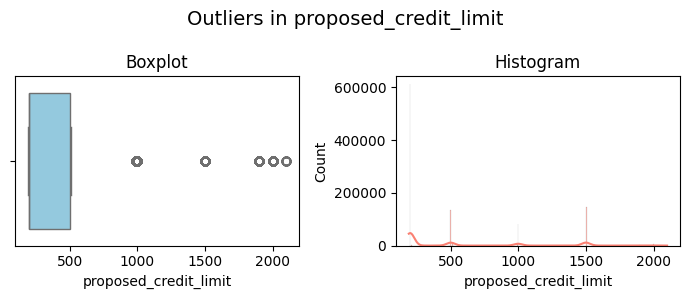

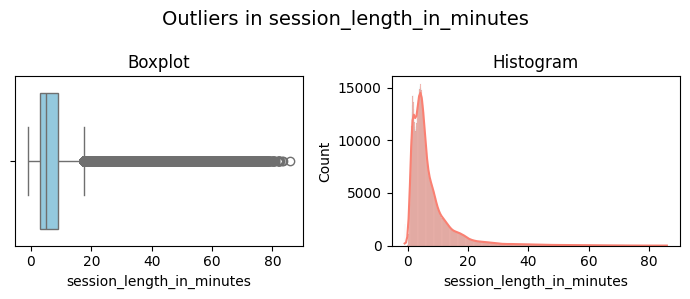

In [9]:
cols_to_check = ['income', 'name_email_similarity','prev_address_months_count', 'current_address_months_count', 'customer_age','days_since_request','date_of_birth_distinct_emails_4w',
                 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes']
visualize_outliers(new_df, cols_to_check)

In [10]:
#Examine outliers & replace with upper/ lower bound
col_list2=['prev_address_months_count', 'current_address_months_count', 'customer_age','days_since_request','date_of_birth_distinct_emails_4w',
                 'credit_risk_score', 'proposed_credit_limit','session_length_in_minutes']
#Find Quartiles
percentiles = [25, 50, 75]

for i in col_list2:
    mhv_quartiles = np.percentile(new_df[i], percentiles)
    mhv_iqr = mhv_quartiles[2]-mhv_quartiles[0]
    lower_bound = mhv_quartiles[0]-(1.5*mhv_iqr)
    upper_bound = mhv_quartiles[2]+(1.5*mhv_iqr)
    #Find number of outliers:
    mhv_num_outliers = sum((new_df[i]<lower_bound) | (new_df[i]>upper_bound))
    print(i)
    print(f"Number of outliers: {mhv_num_outliers}")
    print(f"Lower bound:{lower_bound} and upper bound: {upper_bound}")
    
    #Handeling outliers: replace with upper / lower bound
    new_df[i]= np.where(new_df[i]<lower_bound,lower_bound,new_df[i])
    new_df[i]= np.where(new_df[i]>upper_bound,upper_bound,new_df[i])
    mhv_num_outliers2 = sum((new_df[i]<lower_bound) | (new_df[i]>upper_bound))
    print(f"Num of outliers after replacing: {mhv_num_outliers2}")

prev_address_months_count
Number of outliers: 163603
Lower bound:-18.0 and upper bound: 30.0
Num of outliers after replacing: 0
current_address_months_count
Number of outliers: 41493
Lower bound:-145.0 and upper bound: 295.0
Num of outliers after replacing: 0
customer_age
Number of outliers: 1370
Lower bound:-10.0 and upper bound: 70.0
Num of outliers after replacing: 0
days_since_request
Number of outliers: 94270
Lower bound:-0.02150375723544965 and upper bound: 0.05500571047036095
Num of outliers after replacing: 0
date_of_birth_distinct_emails_4w
Number of outliers: 9682
Lower bound:-4.5 and upper bound: 23.5
Num of outliers after replacing: 0
credit_risk_score
Number of outliers: 8720
Lower bound:-59.5 and upper bound: 320.5
Num of outliers after replacing: 0
proposed_credit_limit
Number of outliers: 241078
Lower bound:-250.0 and upper bound: 950.0
Num of outliers after replacing: 0
session_length_in_minutes
Number of outliers: 78570
Lower bound:-5.530582829135028 and upper bound: 

2C. Transform Categorical columns

In [11]:
cols_to_drop = ['intended_balcon_amount','zip_count_4w','velocity_6h','velocity_24h','velocity_4w','bank_branch_count_8w',
                'housing_status','source','device_os','device_distinct_emails_8w','prev_address_months_count_is_null',
                'current_address_months_count_is_null','bank_months_count_is_null','device_distinct_emails_8w_is_null','device_fraud_count']
new_df = new_df.drop(cols_to_drop, axis=1)
#print(new_df.info())

In [12]:
new_df = pd.get_dummies(data=new_df, columns=['payment_type','employment_status'])
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 995746 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        995746 non-null  int64  
 1   income                            995746 non-null  float64
 2   name_email_similarity             995746 non-null  float64
 3   prev_address_months_count         995746 non-null  float64
 4   current_address_months_count      995746 non-null  float64
 5   customer_age                      995746 non-null  float64
 6   days_since_request                995746 non-null  float64
 7   date_of_birth_distinct_emails_4w  995746 non-null  float64
 8   credit_risk_score                 995746 non-null  float64
 9   email_is_free                     995746 non-null  int64  
 10  phone_home_valid                  995746 non-null  int64  
 11  phone_mobile_valid                995746 non-null  int64 

In [13]:
#Correlation
data_corr = round(new_df.corr(),3)
print(data_corr)


                                  fraud_bool  income  name_email_similarity  \
fraud_bool                             1.000   0.045                 -0.037   
income                                 0.045   1.000                 -0.039   
name_email_similarity                 -0.037  -0.039                  1.000   
prev_address_months_count             -0.045   0.019                 -0.038   
current_address_months_count           0.035  -0.036                  0.053   
customer_age                           0.063   0.127                 -0.049   
days_since_request                    -0.009  -0.031                 -0.028   
date_of_birth_distinct_emails_4w      -0.044  -0.063                  0.023   
credit_risk_score                      0.070   0.172                  0.049   
email_is_free                          0.028  -0.025                 -0.067   
phone_home_valid                      -0.035   0.025                 -0.003   
phone_mobile_valid                    -0.013   0.015

<function matplotlib.pyplot.ticklabel_format(*, axis: "Literal['both', 'x', 'y']" = 'both', style: "Literal['', 'sci', 'scientific', 'plain'] | None" = None, scilimits: 'tuple[int, int] | None' = None, useOffset: 'bool | float | None' = None, useLocale: 'bool | None' = None, useMathText: 'bool | None' = None) -> 'None'>

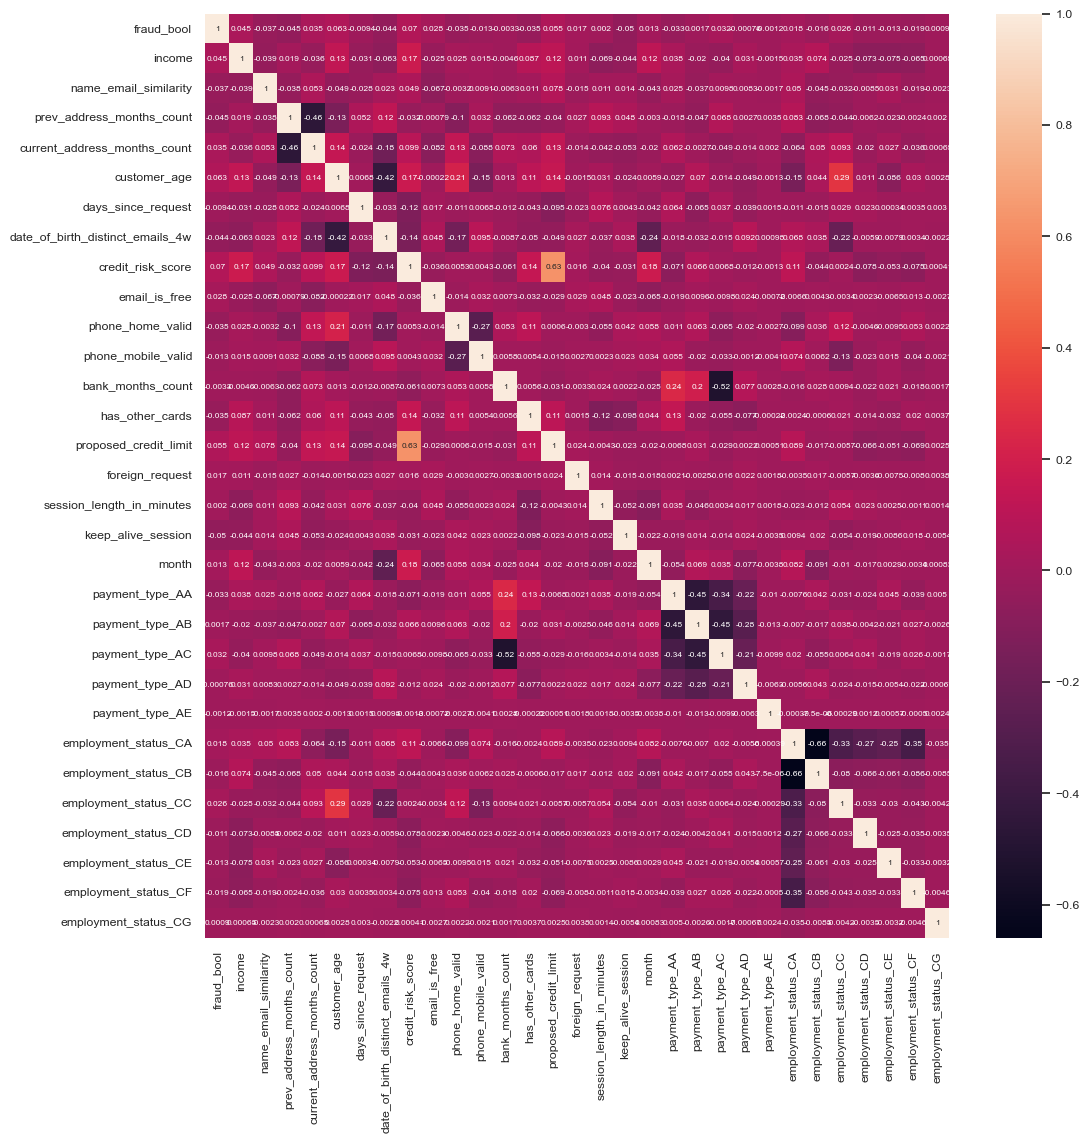

In [14]:
#correlation heatmap
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)
sns.heatmap(new_df[data_corr.index].corr(), annot=True, annot_kws={'size':6})
plt.ticklabel_format

In [15]:
categorical_cols = ['email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'keep_alive_session', 
       'payment_type_AA', 'payment_type_AB', 'payment_type_AC','payment_type_AE','payment_type_AD', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE','employment_status_CF','employment_status_CG']

for i in categorical_cols:
    print(f'{i} : {new_df[i].value_counts()}')

email_is_free : email_is_free
1    527392
0    468354
Name: count, dtype: int64
phone_home_valid : phone_home_valid
0    579831
1    415915
Name: count, dtype: int64
phone_mobile_valid : phone_mobile_valid
1    885712
0    110034
Name: count, dtype: int64
has_other_cards : has_other_cards
0    773261
1    222485
Name: count, dtype: int64
keep_alive_session : keep_alive_session
1    574372
0    421374
Name: count, dtype: int64
payment_type_AA : payment_type_AA
False    737998
True     257748
Name: count, dtype: int64
payment_type_AB : payment_type_AB
False    627139
True     368607
Name: count, dtype: int64
payment_type_AC : payment_type_AC
False    744751
True     250995
Name: count, dtype: int64
payment_type_AE : payment_type_AE
False    995457
True        289
Name: count, dtype: int64
payment_type_AD : payment_type_AD
False    877639
True     118107
Name: count, dtype: int64
employment_status_CA : employment_status_CA
True     726732
False    269014
Name: count, dtype: int64
employme

In [16]:
cols_to_drop2 = ['name_email_similarity','payment_type_AE', 'employment_status_CG','date_of_birth_distinct_emails_4w','foreign_request']
new_df = new_df.drop(columns=cols_to_drop2, axis=1)  # Dropping device_fraud_count as it is not needed

In [17]:
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 995746 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fraud_bool                    995746 non-null  int64  
 1   income                        995746 non-null  float64
 2   prev_address_months_count     995746 non-null  float64
 3   current_address_months_count  995746 non-null  float64
 4   customer_age                  995746 non-null  float64
 5   days_since_request            995746 non-null  float64
 6   credit_risk_score             995746 non-null  float64
 7   email_is_free                 995746 non-null  int64  
 8   phone_home_valid              995746 non-null  int64  
 9   phone_mobile_valid            995746 non-null  int64  
 10  bank_months_count             995746 non-null  int64  
 11  has_other_cards               995746 non-null  int64  
 12  proposed_credit_limit         995746 non-null  fl

# 3. Preparing Traning and Testing sets

 1. Handeling imblance with SMOTE

 2. Prepare train and test set: 
 - Training set: resampling with SMOTE method. (Month 0-5)
 - Validation set: original (Month 6)
 - Testing set: orignal (Month 7)


## Training Set

In [18]:
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [19]:
#Split datasets - and exclude "month" col
df1 = new_df[new_df['month']<=5]  #training set
df2 = new_df[new_df['month']==6] #validation set
df3 = new_df[new_df['month']==7]  #test set

In [20]:
#Categorical features
cat_features = ['email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'keep_alive_session', 
       'payment_type_AA', 'payment_type_AB', 'payment_type_AC','payment_type_AD', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE','employment_status_CF']

In [21]:
scaler = MinMaxScaler()

In [22]:
def scaled_df_transform(X):
    #1. Separate categorical cols
    X_train_cat = X[cat_features]   #df with header
    #print('Categorical cols:', X_train_cat.columns)

    #2 Seperate numerical cols
    num_cols = [colnames for colnames in X.columns if colnames not in cat_features]
    X_train_num = X[num_cols]      #df with header
    #print('Numberical cols before scaling:', X_train_num.columns)

    #2B Apply scaler to numerical columns
    X_train_num_df = pd.DataFrame(
        scaler.fit_transform(X_train_num),
        columns=X_train_num.columns,   #reserver column names
        index=X_train_num.index
    )
    #print('Numberical cols after scaling:', X_train_num_df.columns)

    X_train_scaled = pd.concat([X_train_cat, X_train_num_df], axis=1)
    print('Scaled df:')
    X_train_scaled.info()

    return X_train_scaled

In [23]:
# Training set
X_train = df1.drop(['fraud_bool','month'], axis= 1)
y_train = df1['fraud_bool']

print(X_train.shape, y_train.shape)

print(X_train.columns)



(791962, 24) (791962,)
Index(['income', 'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'session_length_in_minutes', 'keep_alive_session', 'payment_type_AA',
       'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'employment_status_CA', 'employment_status_CB', 'employment_status_CC',
       'employment_status_CD', 'employment_status_CE', 'employment_status_CF'],
      dtype='object')


In [24]:

X_train_scaled = scaled_df_transform(X_train)


Scaled df:
<class 'pandas.core.frame.DataFrame'>
Index: 791962 entries, 0 to 794988
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   email_is_free                 791962 non-null  int64  
 1   phone_home_valid              791962 non-null  int64  
 2   phone_mobile_valid            791962 non-null  int64  
 3   has_other_cards               791962 non-null  int64  
 4   keep_alive_session            791962 non-null  int64  
 5   payment_type_AA               791962 non-null  bool   
 6   payment_type_AB               791962 non-null  bool   
 7   payment_type_AC               791962 non-null  bool   
 8   payment_type_AD               791962 non-null  bool   
 9   employment_status_CA          791962 non-null  bool   
 10  employment_status_CB          791962 non-null  bool   
 11  employment_status_CC          791962 non-null  bool   
 12  employment_status_CD          791962 n

## Training set: handeling Imbalance with SMOTE


In [25]:
#Training set: Apply SMOTE
smotenc = SMOTENC(categorical_features = cat_features, sampling_strategy='minority', random_state=42)
X_resampled_snc, y_resampled_snc = smotenc.fit_resample(X_train_scaled, y_train)
print('Training set')
print('Before Sampling:', X_train_scaled.shape, y_train.shape)
print('After Sampling:', X_resampled_snc.shape, y_resampled_snc.shape)

Training set
Before Sampling: (791962, 24) (791962,)
After Sampling: (1567640, 24) (1567640,)


In [26]:
print(y_resampled_snc.value_counts())

fraud_bool
0    783820
1    783820
Name: count, dtype: int64


In [27]:
#print(X_train_scaled.describe())

## Testing Set & Validation set

In [28]:
#Validation set
X_val = df2.drop(['fraud_bool','month'], axis=1)
y_val = df2['fraud_bool']
print(X_val.shape, y_val.shape)


(107776, 24) (107776,)


In [29]:
X_val_scaled = scaled_df_transform(X_val)

Scaled df:
<class 'pandas.core.frame.DataFrame'>
Index: 107776 entries, 794989 to 903156
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   email_is_free                 107776 non-null  int64  
 1   phone_home_valid              107776 non-null  int64  
 2   phone_mobile_valid            107776 non-null  int64  
 3   has_other_cards               107776 non-null  int64  
 4   keep_alive_session            107776 non-null  int64  
 5   payment_type_AA               107776 non-null  bool   
 6   payment_type_AB               107776 non-null  bool   
 7   payment_type_AC               107776 non-null  bool   
 8   payment_type_AD               107776 non-null  bool   
 9   employment_status_CA          107776 non-null  bool   
 10  employment_status_CB          107776 non-null  bool   
 11  employment_status_CC          107776 non-null  bool   
 12  employment_status_CD          107

In [30]:
#Testing set
X_test = df3.drop(['fraud_bool','month'], axis=1)
y_test = df3['fraud_bool']
print(X_test.shape, y_test.shape)


(96008, 24) (96008,)


In [31]:
X_test_scaled = scaled_df_transform(X_test)

Scaled df:
<class 'pandas.core.frame.DataFrame'>
Index: 96008 entries, 903157 to 999999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   email_is_free                 96008 non-null  int64  
 1   phone_home_valid              96008 non-null  int64  
 2   phone_mobile_valid            96008 non-null  int64  
 3   has_other_cards               96008 non-null  int64  
 4   keep_alive_session            96008 non-null  int64  
 5   payment_type_AA               96008 non-null  bool   
 6   payment_type_AB               96008 non-null  bool   
 7   payment_type_AC               96008 non-null  bool   
 8   payment_type_AD               96008 non-null  bool   
 9   employment_status_CA          96008 non-null  bool   
 10  employment_status_CB          96008 non-null  bool   
 11  employment_status_CC          96008 non-null  bool   
 12  employment_status_CD          96008 non-null  bo

In [32]:
print('Training set')
print('- Before Sampling:', X_train_scaled.shape, y_train.shape)
print('- After Sampling:', X_resampled_snc.shape, y_resampled_snc.shape)
print('Validation set:', X_val_scaled.shape, y_val.shape)
print('Testing set:', X_test_scaled.shape, y_test.shape)

Training set
- Before Sampling: (791962, 24) (791962,)
- After Sampling: (1567640, 24) (1567640,)
Validation set: (107776, 24) (107776,)
Testing set: (96008, 24) (96008,)


# 4. Model Building


## Functions

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, average_precision_score, precision_score, recall_score

In [34]:
model_name = list()
version_notes = list()
precision = list()
recall = list()
Macro_F1 = list()
PR_AUC = list()

In [35]:
def model_eval(model, X_train, y_train, X_val_scaled, X_test_scaled, algo_name, notes):
    
    y_train_predicted = model.predict(X_train)
    y_val_predicted = model.predict(X_val_scaled)
    y_test_predicted = model.predict(X_test_scaled)
    y_test_predicted_proba = model.predict_proba(X_test_scaled)[:, 1]   

    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_test_predicted))

    # print(f'Classification Report - validation set:')
    # print(classification_report(y_val, y_val_predicted))

    print(f'Classification Report  - test set:')
    print(classification_report(y_test, y_test_predicted))
    print(f'Macro F1 Score: {f1_score(y_test, y_test_predicted, average="macro")}')
    print(f'PR-AUC Score: {average_precision_score(y_test, y_test_predicted_proba)}')

    model_name.append(algo_name)
    version_notes.append(notes)
    precision.append(precision_score(y_test, y_test_predicted))
    recall.append(recall_score(y_test, y_test_predicted))
    Macro_F1.append(f1_score(y_test, y_test_predicted, average='macro'))
    PR_AUC.append(average_precision_score(y_test, y_test_predicted_proba)) 
    





## Decision Tree - Baseline model

In [37]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_resampled_snc, y_resampled_snc)
print('Decision Tree Classifer')
model_eval(tree_model, X_resampled_snc, y_resampled_snc, X_val_scaled, X_test_scaled,'Decision Tree Classifier', 'baseline model')

Decision Tree Classifer
Confusion Matrix
[[92358  2226]
 [ 1257   167]]
Classification Report  - test set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     94584
           1       0.07      0.12      0.09      1424

    accuracy                           0.96     96008
   macro avg       0.53      0.55      0.53     96008
weighted avg       0.97      0.96      0.97     96008

Macro F1 Score: 0.534498134470544
PR-AUC Score: 0.021276934711954753


In [38]:
#Decision Tree Feature importances
dt_feature_importances = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance':tree_model.feature_importances_

}).sort_values(by='importance',ascending=False)
print(dt_feature_importances)

                         feature  importance
18                  customer_age    0.300180
15                        income    0.115503
17  current_address_months_count    0.101976
3                has_other_cards    0.085393
1               phone_home_valid    0.073006
21             bank_months_count    0.053415
20             credit_risk_score    0.049039
23     session_length_in_minutes    0.045227
19            days_since_request    0.044893
4             keep_alive_session    0.029362
0                  email_is_free    0.018464
9           employment_status_CA    0.016252
22         proposed_credit_limit    0.016036
5                payment_type_AA    0.011089
16     prev_address_months_count    0.008895
7                payment_type_AC    0.006695
6                payment_type_AB    0.004798
8                payment_type_AD    0.004366
2             phone_mobile_valid    0.004290
10          employment_status_CB    0.004000
12          employment_status_CD    0.002662
14        

## 4: FLAML AutoML

### FLAML - V1. Basic Settings
- Handling imbalance with SMOTENC

In [39]:
#original code from the doc import AutoML is not working, need to use the following

from flaml.automl.automl import AutoML
from sklearn.metrics import f1_score, average_precision_score

In [46]:
automl = AutoML()
automl_settings = {
    "time_budget": 300,  # total running time in seconds
    "metric": "macro_f1",  # primary metric
    "task": "classification",  # task type
    "log_file_name": "automl_fraud.log",  # log file
}
automl.fit(X_train=X_resampled_snc, y_train =y_resampled_snc, **automl_settings)


[flaml.automl.logger: 06-10 20:02:43] {1752} INFO - task = classification
[flaml.automl.logger: 06-10 20:02:43] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 06-10 20:02:44] {1862} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 06-10 20:02:45] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 06-10 20:02:45] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-10 20:02:45] {2417} INFO - Estimated sufficient time budget=137988s. Estimated necessary time budget=3194s.
[flaml.automl.logger: 06-10 20:02:45] {2466} INFO -  at 6.7s,	estimator lgbm's best error=0.2176,	best estimator lgbm's best error=0.2176
[flaml.automl.logger: 06-10 20:02:45] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-10 20:02:45] {2466} INFO -  at 6.8s,	estimator lgbm's best error=0.2176,	best estimator lgbm's best error=0.2176
[flaml.automl.logg

In [47]:
print('Best ML Learner:')
print(automl.model.estimator)
print('-'*80)
print('Best hyeperparameters found by AutoML - after tuning:')
print(automl.best_config)
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
print('Best loss:', automl.best_loss)

Best ML Learner:
LGBMClassifier(colsample_bytree=np.float64(0.5674225168356628),
               learning_rate=np.float64(0.24470418441570366), max_bin=1023,
               min_child_samples=7, n_estimators=2210, n_jobs=-1,
               num_leaves=233, reg_alpha=np.float64(0.010222688826486602),
               reg_lambda=np.float64(0.01470751699097814), verbose=-1)
--------------------------------------------------------------------------------
Best hyeperparameters found by AutoML - after tuning:
{'n_estimators': 2210, 'num_leaves': 233, 'min_child_samples': 7, 'learning_rate': np.float64(0.24470418441570366), 'log_max_bin': 10, 'colsample_bytree': np.float64(0.5674225168356628), 'reg_alpha': np.float64(0.010222688826486602), 'reg_lambda': np.float64(0.01470751699097814)}
Training duration of best run: 278.3 s
Best loss: 0.005741141932347316


In [48]:
estimator_score = pd.DataFrame.from_dict(automl.best_loss_per_estimator, orient='index' )
estimator_score.columns =['Best Loss Value']
estimator_score.sort_values(by= 'Best Loss Value')
print(estimator_score)

                Best Loss Value
lgbm                   0.005741
rf                     0.140835
xgboost                0.051919
extra_tree             0.134509
xgb_limitdepth         0.054683
sgd                    0.182943
lrl1                   0.178766


In [ ]:
#Evaluate predictions
print('FLAML AutoML with SMOTENC')
model_eval(automl, X_resampled_snc, y_resampled_snc, X_val_scaled, X_test_scaled, 'FLAML Classifier', 'V1 - basic settings')

FLAML AutoML with SMOTENC
Confusion Matrix
[[94470   114]
 [ 1394    30]]
Classification Report  - test set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     94584
           1       0.21      0.02      0.04      1424

    accuracy                           0.98     96008
   macro avg       0.60      0.51      0.52     96008
weighted avg       0.97      0.98      0.98     96008

Macro F1 Score: 0.5151735671165046
PR-AUC Score: 0.07573570549767528


### FLAML - V1. Not Applying SMOTE

In [40]:
automl1 = AutoML()
automl_settings1 = {
    "time_budget": 300,  # total running time in seconds
    "metric": "macro_f1",  # primary metric
    "task": "classification",  # task type
    "log_file_name": "automl_v1.log"  # log file
}
automl1.fit(X_train=X_train_scaled, y_train =y_train, **automl_settings1)

[flaml.automl.logger: 06-10 23:11:22] {1752} INFO - task = classification
[flaml.automl.logger: 06-10 23:11:22] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 06-10 23:11:22] {1862} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 06-10 23:11:22] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 06-10 23:11:22] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-10 23:11:22] {2417} INFO - Estimated sufficient time budget=41233s. Estimated necessary time budget=955s.
[flaml.automl.logger: 06-10 23:11:22] {2466} INFO -  at 2.9s,	estimator lgbm's best error=0.5026,	best estimator lgbm's best error=0.5026
[flaml.automl.logger: 06-10 23:11:22] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-10 23:11:22] {2466} INFO -  at 3.0s,	estimator lgbm's best error=0.5026,	best estimator lgbm's best error=0.5026
[flaml.automl.logger

In [41]:
print('Best ML Learner:')
print(automl1.model.estimator)
print('-'*80)
print('Best hyeperparameters found by AutoML:')
print(automl1.best_config)
print('Training duration of best run: {0:.4g} s'.format(automl1.best_config_train_time))
print('Best loss:', automl1.best_loss)

Best ML Learner:
LGBMClassifier(colsample_bytree=np.float64(0.9923979236129069),
               learning_rate=np.float64(0.2754501395687794), max_bin=255,
               min_child_samples=19, n_estimators=4, n_jobs=-1, num_leaves=710,
               reg_alpha=np.float64(0.06344060757591968),
               reg_lambda=np.float64(0.0632573593414115), verbose=-1)
--------------------------------------------------------------------------------
Best hyeperparameters found by AutoML:
{'n_estimators': 4, 'num_leaves': 710, 'min_child_samples': 19, 'learning_rate': np.float64(0.2754501395687794), 'log_max_bin': 8, 'colsample_bytree': np.float64(0.9923979236129069), 'reg_alpha': np.float64(0.06344060757591968), 'reg_lambda': np.float64(0.0632573593414115)}
Training duration of best run: 0.6187 s
Best loss: 0.46017868340980084


In [42]:
#Evaluate predictions
print('FLAML AutoML - V1. Not applying SMOTE')
model_eval(automl1, X_train_scaled, y_train,  X_val_scaled, X_test_scaled,'FLAML Classifier', 'V1 - Not applying SMOTE')

FLAML AutoML - V1. Not applying SMOTE
Confusion Matrix
[[94213   371]
 [ 1347    77]]
Classification Report  - test set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     94584
           1       0.17      0.05      0.08      1424

    accuracy                           0.98     96008
   macro avg       0.58      0.53      0.54     96008
weighted avg       0.97      0.98      0.98     96008

Macro F1 Score: 0.5366148498879482
PR-AUC Score: 0.06969243256222607


### FLAML - V2. Custom Hyperparameters

In [43]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, precision_recall_curve, average_precision_score
from flaml import tune

In [44]:
#Add Custom Hyperparameters
custom_params2 = {

    # LightGBM
    "lgbm":{
        # Limit Max Depth to 1 - 15
        "max_depth":{
            "domain": tune.randint(lower = 1, upper = 12)},
        "learning_rate":{
            "domain": tune.loguniform(lower = 0.1, upper = 0.1)},

        # More boosting
        "n_estimators":{
            "domain": tune.lograndint(lower = 5, upper =200 ),
            "low_cost_init_value": 20
        }
    
    },
    "xgboost":{
        # Limit Max Depth to 1 - 15
        "max_depth":{
            "domain": tune.randint(lower = 1, upper = 12)},
        "learning_rate":{
            "domain": tune.loguniform(lower = 0.1, upper = 0.1)},

        # More boosting
        "n_estimators":{
            "domain": tune.lograndint(lower = 5, upper =200 ),
            "low_cost_init_value": 20
        }
    
    }
}

In [ ]:
automl2 = AutoML()

automl_settings4 = {
    "time_budget": 300,
    "max_iter":200,
    "metric": 'macro_f1',
    "task": 'classification',
    "estimator_list": ['lgbm', 'xgboost', 'rf'],
    "log_file_name":"automl_v2.log",
    "eval_method": "cv",
    "split_type": RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42),
    "custom_hp": custom_params2,
    "verbose":1,
    "seed":42
}

In [46]:
automl2.fit(X_train = X_resampled_snc, y_train = y_resampled_snc, **automl_settings4)

c:\Users\kimth\OneDrive\Documents\Projects\Machine Learning\ml_env\Lib\site-packages\flaml\tune\space.py:345: RuntimeWarning: divide by zero encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
c:\Users\kimth\OneDrive\Documents\Projects\Machine Learning\ml_env\Lib\site-packages\flaml\tune\space.py:345: RuntimeWarning: divide by zero encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


In [47]:
#Evaluate predictions
print('FLAML - V2 Tuning with CV & Hyperparameters')
model_eval(automl2, X_resampled_snc, y_resampled_snc, X_val_scaled, X_test_scaled, 'FLAML Classifier', 'V2 - tuning with CV')

FLAML - V2 Tuning with CV & Hyperparameters
Confusion Matrix
[[85497  9087]
 [  648   776]]
Classification Report  - test set:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95     94584
           1       0.08      0.54      0.14      1424

    accuracy                           0.90     96008
   macro avg       0.54      0.72      0.54     96008
weighted avg       0.98      0.90      0.93     96008

Macro F1 Score: 0.5418190715246852
PR-AUC Score: 0.11882733753648889


In [48]:

print('Best hyeperparameters found by AutoML - after tuning:')
print(automl2.best_config)
print('Training duration of best run: {0:.4g} s'.format(automl2.best_config_train_time))
print('Best loss:', automl2.best_loss)

Best hyeperparameters found by AutoML - after tuning:
{'num_leaves': 4, 'min_child_samples': 20, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.0009765625), 'reg_lambda': np.float64(1.0), 'n_estimators': 104, 'learning_rate': 0.10000000000000005, 'max_depth': 7}
Training duration of best run: 5.131 s
Best loss: 0.10833476730951981


# 5. Feature Engineering

In [ ]:
#Extract Feature Importance of V2
feature_importance_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance':automl2.model.feature_importances_

}).sort_values(by='importance',ascending=False)
print(feature_importance_df)

                         feature  importance
18                  customer_age          70
15                        income          53
21             bank_months_count          35
3                has_other_cards          24
1               phone_home_valid          18
20             credit_risk_score          16
17  current_address_months_count          16
0                  email_is_free          13
4             keep_alive_session          13
9           employment_status_CA          10
16     prev_address_months_count          10
5                payment_type_AA           9
14          employment_status_CF           8
23     session_length_in_minutes           5
12          employment_status_CD           4
19            days_since_request           3
13          employment_status_CE           2
10          employment_status_CB           2
22         proposed_credit_limit           1
2             phone_mobile_valid           0
7                payment_type_AC           0
6         

In [51]:
#Select top 15 features from V2
top_features = feature_importance_df['feature'].head(15).tolist()
print(top_features)

['customer_age', 'income', 'bank_months_count', 'has_other_cards', 'phone_home_valid', 'credit_risk_score', 'current_address_months_count', 'email_is_free', 'keep_alive_session', 'employment_status_CA', 'prev_address_months_count', 'payment_type_AA', 'employment_status_CF', 'session_length_in_minutes', 'employment_status_CD']


In [52]:
# Prepare Training /Testing set with top feature columns only
# Training set
X_resampled_snc_fe = X_resampled_snc[top_features]
print(X_resampled_snc_fe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567640 entries, 0 to 1567639
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   customer_age                  1567640 non-null  float64
 1   income                        1567640 non-null  float64
 2   bank_months_count             1567640 non-null  float64
 3   has_other_cards               1567640 non-null  int64  
 4   phone_home_valid              1567640 non-null  int64  
 5   credit_risk_score             1567640 non-null  float64
 6   current_address_months_count  1567640 non-null  float64
 7   email_is_free                 1567640 non-null  int64  
 8   keep_alive_session            1567640 non-null  int64  
 9   employment_status_CA          1567640 non-null  bool   
 10  prev_address_months_count     1567640 non-null  float64
 11  payment_type_AA               1567640 non-null  bool   
 12  employment_status_CF        

In [53]:
# Validation & Testing set
X_val_scaled_fe = X_val_scaled[top_features]
X_test_scaled_fe = X_test_scaled[top_features]
#print(X_val_scaled_fe.info())
#print(X_test_scaled_fe.info())

#### FLAML - V3. Top Features

In [55]:
#FLAML - Using top feature columns and leverage the same settings as V2
automl3 = AutoML()

automl_settings4 = {
    "time_budget": 300,
    "max_iter":200,
    "metric": 'macro_f1',
    "task": 'classification',
    "estimator_list": ['lgbm', 'xgboost', 'rf'],
    "log_file_name":"automl_v4.log",
    "eval_method": "cv",
    "split_type": RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42),
    "custom_hp": custom_params2,
    "verbose":1,
    "seed":42
}

In [57]:
automl3.fit(X_train = X_resampled_snc_fe, y_train = y_resampled_snc, **automl_settings4)

c:\Users\kimth\OneDrive\Documents\Projects\Machine Learning\ml_env\Lib\site-packages\flaml\tune\space.py:345: RuntimeWarning: divide by zero encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
c:\Users\kimth\OneDrive\Documents\Projects\Machine Learning\ml_env\Lib\site-packages\flaml\tune\space.py:345: RuntimeWarning: divide by zero encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


In [58]:
#V3 Evaluate predictions
print('FLAML - V3 Tuning with Top Features')
model_eval(automl3, X_resampled_snc_fe, y_resampled_snc, X_val_scaled_fe, X_test_scaled_fe, 'FLAML Classifier', 'V3 - tuning with Top Features')

FLAML - V3 Tuning with Top Features
Confusion Matrix
[[85746  8838]
 [  654   770]]
Classification Report  - test set:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     94584
           1       0.08      0.54      0.14      1424

    accuracy                           0.90     96008
   macro avg       0.54      0.72      0.54     96008
weighted avg       0.98      0.90      0.94     96008

Macro F1 Score: 0.5435736417567046
PR-AUC Score: 0.11821649561841277


# 6. Evaluation

## Confusion Matrix visualization


In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

In [60]:
def cm_display(model, X_test_scaled, title):
    y_test_predicted = model.predict(X_test_scaled)
    # cm= confusion_matrix(y_test, y_test_predicted)
    plt.figure(figsize=(4,4))
    cm_viz = ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted, cmap=plt.cm.YlGnBu, ax=None)
    plt.title(f'{title} - Confusion Matrix')
    plt.grid(False)
    plt.show()

<Figure size 400x400 with 0 Axes>

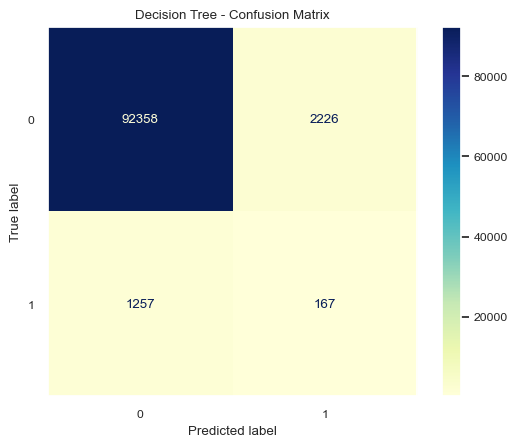

In [61]:
#Decision Tree
cm_display(tree_model, X_test_scaled, 'Decision Tree')

<Figure size 400x400 with 0 Axes>

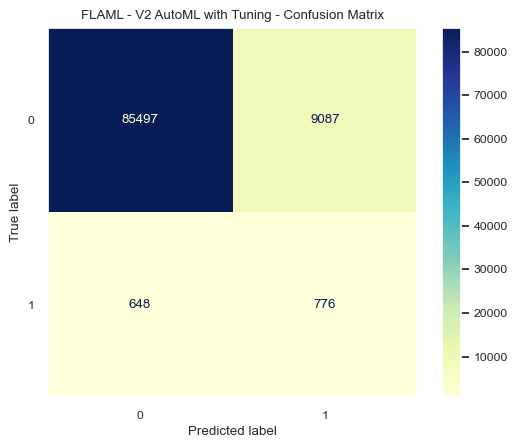

In [62]:
cm_display(automl2, X_test_scaled, 'FLAML - V2 AutoML with Tuning')

## Precision Recal Curve

In [63]:
def pre_au_viz(model, title):
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] 
    precision, recall, threasholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)

    plt.figure(figsize=(4,4))
    plt.plot(recall, precision, label=f'PR AUC={pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{title} - Precision_Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

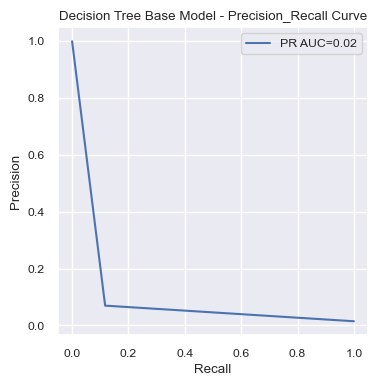

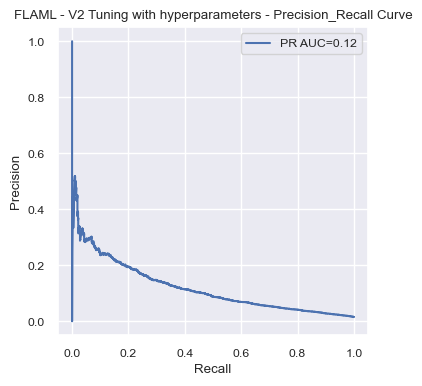

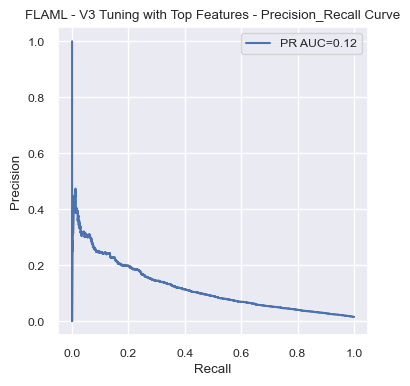

In [65]:
pre_au_viz(tree_model, 'Decision Tree Base Model')  #Base model
pre_au_viz(automl2,'FLAML - V2 Tuning with hyperparameters')
pre_au_viz(automl3,'FLAML - V3 Tuning with Top Features')

## Model Comparision

In [66]:
model_comparison_df = pd.DataFrame({'model': model_name,
                                    'version_notes': version_notes,
                                    'precision': precision,
                                    'recall': recall,
                                    'Macro_F1': Macro_F1,
                                    'PR_AUC': PR_AUC})

In [70]:

# model_comparison_df.sort_values(by=['version_notes'], ascending= True)
#print(model_comparison_df)

In [ ]:
# Table Visualize
model_comparison_df.style.background_gradient(cmap='viridis')
model_comparison_df

,model,version_notes,precision,recall,Macro_F1,PR_AUC
0,Decision Tree Classifier,baseline model,0.069787,0.117275,0.534498,0.021277
1,FLAML Classifier,V1 - Not applying SMOTE,0.171875,0.054073,0.536615,0.069692
2,FLAML Classifier,V2 - tuning with CV,0.078678,0.544944,0.541819,0.118827
3,FLAML Classifier,V3 - tuning with Top Features,0.080142,0.540730,0.543574,0.118216
